Data loaded: 178 points
   latitude   longitude
0 -6.118484  106.858802
1 -6.118550  106.857765
2 -6.118571  106.857370
3 -6.118606  106.856866
4 -6.118635  106.856443

UTM Zone: 48
Eastings range: 705382.76 to 706052.97
Northings range: -676675.66 to -676385.35

Koordinat lokal pertama: (0.00, 0.00)
Koordinat lokal terakhir: (0.00, 0.00)


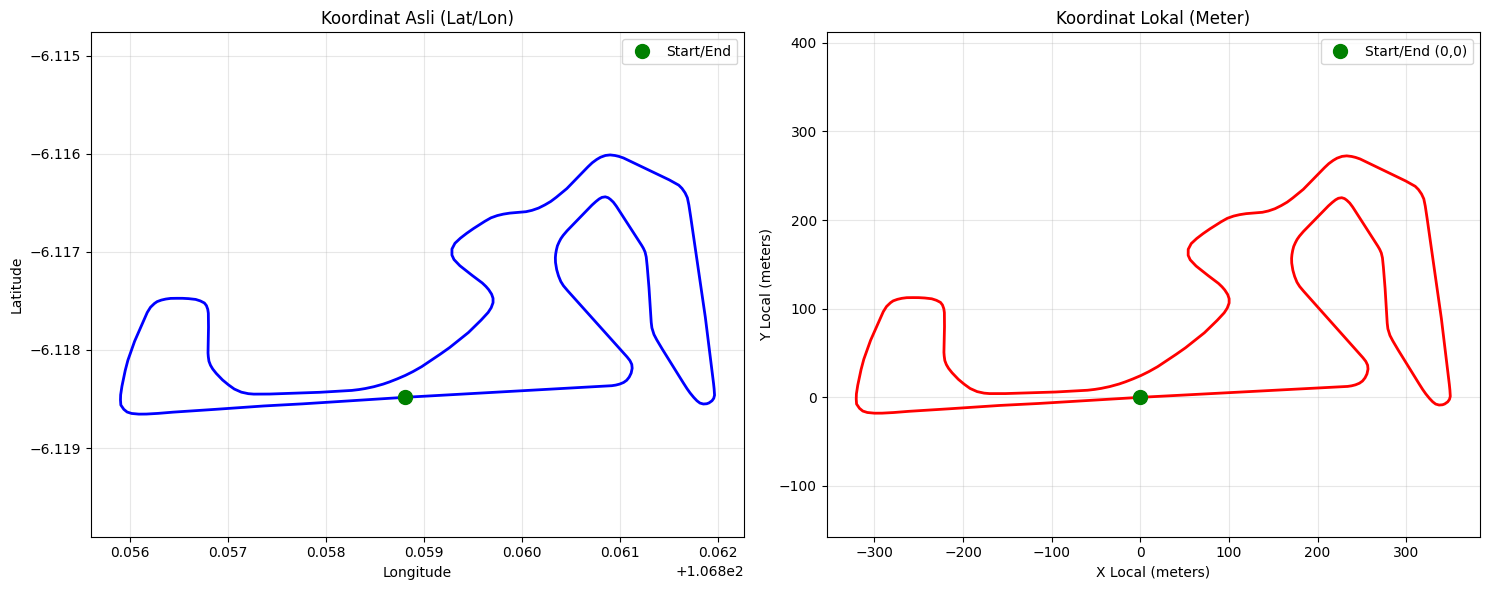


HASIL KONVERSI KOORDINAT LOKAL

Titik referensi UTM: Easting=705703.25, Northing=-676657.77
Jumlah titik: 178

5 titik pertama (koordinat lokal dalam meter):
Point 0: x=0.00m, y=0.00m
Point 1: x=-114.88m, y=-6.94m
Point 2: x=-158.64m, y=-9.16m
Point 3: x=-214.36m, y=-12.85m
Point 4: x=-261.24m, y=-15.79m

Jarak maksimum dari titik start: 391.68 meter
Panjang total track: 44251.49 meter

Hasil disimpan ke: centerline_local_coordinates.csv

VERIFIKASI TITIK START DAN END DI (0,0)
Start point - x: 0.000000, y: 0.000000
End point   - x: 0.000000, y: 0.000000
✓ Start point BERADA di (0,0)
✓ End point BERADA di (0,0)


In [1]:
# Block 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Proj, Transformer
import warnings
warnings.filterwarnings('ignore')

# Block 2: Load data
# Pastikan file centerline.csv berada di direktori yang sama
df = pd.read_csv('centerline.csv')
print(f"Data loaded: {len(df)} points")
print(df.head())

# Block 3: Konversi ke UTM
# Cari zona UTM berdasarkan longitude rata-rata
lon_mean = df['longitude'].mean()
# Untuk Indonesia (kebanyakan zona 48-53), tapi kita hitung otomatis
utm_zone = int((lon_mean + 180) / 6) + 1

# Definisikan proyeksi
wgs84 = Proj(proj='latlong', datum='WGS84')
utm_proj = Proj(proj='utm', zone=utm_zone, datum='WGS84')

# Buat transformer
transformer = Transformer.from_proj(wgs84, utm_proj, always_xy=True)

# Konversi semua titik ke UTM
eastings, northings = [], []
for lat, lon in zip(df['latitude'], df['longitude']):
    e, n = transformer.transform(lon, lat)
    eastings.append(e)
    northings.append(n)

# Simpan ke dataframe
df['easting'] = eastings
df['northing'] = northings

print(f"\nUTM Zone: {utm_zone}")
print(f"Eastings range: {min(eastings):.2f} to {max(eastings):.2f}")
print(f"Northings range: {min(northings):.2f} to {max(northings):.2f}")

# Block 4: Normalisasi ke titik awal (0,0)
# Gunakan titik pertama sebagai referensi
easting_ref = df['easting'].iloc[0]
northing_ref = df['northing'].iloc[0]

# Hitung koordinat relatif
df['x_local'] = df['easting'] - easting_ref
df['y_local'] = df['northing'] - northing_ref

# Untuk memastikan titik akhir juga di (0,0), kita perlu menyesuaikan
# Karena dalam data Anda, titik pertama dan terakhir sama
print(f"\nKoordinat lokal pertama: ({df['x_local'].iloc[0]:.2f}, {df['y_local'].iloc[0]:.2f})")
print(f"Koordinat lokal terakhir: ({df['x_local'].iloc[-1]:.2f}, {df['y_local'].iloc[-1]:.2f})")

# Block 5: Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Koordinat asli
axes[0].plot(df['longitude'], df['latitude'], 'b-', linewidth=2)
axes[0].plot(df['longitude'].iloc[0], df['latitude'].iloc[0], 'go', markersize=10, label='Start/End')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Koordinat Asli (Lat/Lon)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].axis('equal')

# Plot 2: Koordinat lokal
axes[1].plot(df['x_local'], df['y_local'], 'r-', linewidth=2)
axes[1].plot(df['x_local'].iloc[0], df['y_local'].iloc[0], 'go', markersize=10, label='Start/End (0,0)')
axes[1].set_xlabel('X Local (meters)')
axes[1].set_ylabel('Y Local (meters)')
axes[1].set_title('Koordinat Lokal (Meter)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].axis('equal')

plt.tight_layout()
plt.show()

# Block 6: Tampilkan hasil
print("\n" + "="*60)
print("HASIL KONVERSI KOORDINAT LOKAL")
print("="*60)
print(f"\nTitik referensi UTM: Easting={easting_ref:.2f}, Northing={northing_ref:.2f}")
print(f"Jumlah titik: {len(df)}")

# Tampilkan beberapa titik pertama
print("\n5 titik pertama (koordinat lokal dalam meter):")
for i in range(min(5, len(df))):
    print(f"Point {i}: x={df['x_local'].iloc[i]:.2f}m, y={df['y_local'].iloc[i]:.2f}m")

# Hitung jarak dari start
distances = np.sqrt(df['x_local']**2 + df['y_local']**2)
print(f"\nJarak maksimum dari titik start: {distances.max():.2f} meter")
print(f"Panjang total track: {distances.sum():.2f} meter")

# Block 7: Simpan hasil ke file CSV
df_result = df[['latitude', 'longitude', 'x_local', 'y_local']].copy()
df_result.to_csv('centerline_local_coordinates.csv', index=False)
print("\nHasil disimpan ke: centerline_local_coordinates.csv")

# Block 8: Verifikasi bahwa start dan end di (0,0)
print("\n" + "="*60)
print("VERIFIKASI TITIK START DAN END DI (0,0)")
print("="*60)
print(f"Start point - x: {df['x_local'].iloc[0]:.6f}, y: {df['y_local'].iloc[0]:.6f}")
print(f"End point   - x: {df['x_local'].iloc[-1]:.6f}, y: {df['y_local'].iloc[-1]:.6f}")

if abs(df['x_local'].iloc[0]) < 0.001 and abs(df['y_local'].iloc[0]) < 0.001:
    print("✓ Start point BERADA di (0,0)")
else:
    print("✗ Start point TIDAK di (0,0)")

if abs(df['x_local'].iloc[-1]) < 0.001 and abs(df['y_local'].iloc[-1]) < 0.001:
    print("✓ End point BERADA di (0,0)")
else:
    print("✗ End point TIDAK di (0,0)")

Panjang total track: 2366.34 meter
Jumlah titik asli: 178 titik
Jumlah titik interpolasi: 2368 titik
Interval: ~1 meter

Data disimpan ke: centerline_interpolated_1m.csv


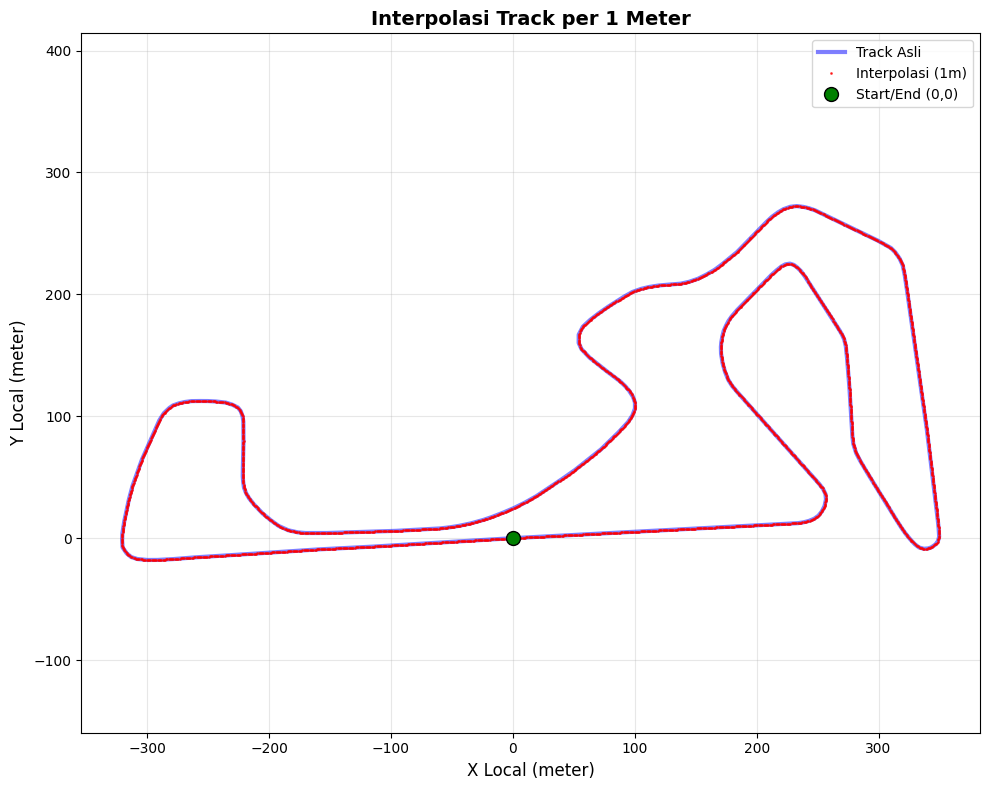


PREVIEW DATA AWAL (10 titik pertama)
 x_meter_interp  y_meter_interp  cumulative_distance
       0.000000        0.000000             0.000000
      -0.997905       -0.060253             0.999722
      -1.995809       -0.120506             1.999444
      -2.993714       -0.180759             2.999166
      -3.991618       -0.241012             3.998888
      -4.989523       -0.301265             4.998610
      -5.987427       -0.361518             5.998332
      -6.985332       -0.421772             6.998054
      -7.983236       -0.482025             7.997775
      -8.981141       -0.542278             8.997497

PREVIEW DATA AKHIR (10 titik terakhir)
 x_meter_interp  y_meter_interp  cumulative_distance
       8.985061        0.472905          2357.344323
       7.986721        0.420360          2358.344045
       6.988381        0.367815          2359.343767
       5.990041        0.315270          2360.343488
       4.991701        0.262725          2361.343210
       3.993360      

In [3]:
# Block 2: Interpolasi per 1 meter distance - Versi Sederhana

import numpy as np
from scipy.interpolate import interp1d

# Hitung jarak kumulatif dari data lokal
x_local = df['x_local'].values
y_local = df['y_local'].values

# Hitung jarak antar titik dan kumulatif
dx = np.diff(x_local)
dy = np.diff(y_local)
segment_distances = np.sqrt(dx**2 + dy**2)
cumulative_distances = np.zeros(len(x_local))
cumulative_distances[1:] = np.cumsum(segment_distances)

print(f"Panjang total track: {cumulative_distances[-1]:.2f} meter")
print(f"Jumlah titik asli: {len(x_local)} titik")

# Buat interpolator
x_interpolator = interp1d(cumulative_distances, x_local, kind='linear', fill_value='extrapolate')
y_interpolator = interp1d(cumulative_distances, y_local, kind='linear', fill_value='extrapolate')

# Buat titik interpolasi setiap 1 meter
max_distance = cumulative_distances[-1]
num_interp_points = int(np.ceil(max_distance)) + 1
distance_interp = np.linspace(0, max_distance, num_interp_points)

# Interpolasi
x_meter_interp = x_interpolator(distance_interp)
y_meter_interp = y_interpolator(distance_interp)

print(f"Jumlah titik interpolasi: {len(distance_interp)} titik")
print(f"Interval: ~1 meter")

# Buat dataframe hasil
df_interp = pd.DataFrame({
    'x_meter_interp': x_meter_interp,
    'y_meter_interp': y_meter_interp,
    'cumulative_distance': distance_interp
})

# Simpan ke CSV
df_interp.to_csv('centerline_interpolated_1m.csv', index=False)
print(f"\nData disimpan ke: centerline_interpolated_1m.csv")

# Visualisasi sederhana
plt.figure(figsize=(10, 8))

# Plot track
plt.plot(x_local, y_local, 'b-', linewidth=3, alpha=0.5, label='Track Asli')
plt.plot(x_meter_interp, y_meter_interp, 'r.', markersize=2, alpha=0.7, label='Interpolasi (1m)')

# Tandai start/end
plt.plot(0, 0, 'go', markersize=10, markeredgecolor='black', linewidth=2, label='Start/End (0,0)')

plt.xlabel('X Local (meter)', fontsize=12)
plt.ylabel('Y Local (meter)', fontsize=12)
plt.title('Interpolasi Track per 1 Meter', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Preview data awal dan akhir
print("\n" + "="*60)
print("PREVIEW DATA AWAL (10 titik pertama)")
print("="*60)
print(df_interp.head(10).to_string(index=False))

print("\n" + "="*60)
print("PREVIEW DATA AKHIR (10 titik terakhir)")
print("="*60)
print(df_interp.tail(10).to_string(index=False))

# Ringkasan singkat
print("\n" + "="*60)
print("RINGKASAN")
print("="*60)
print(f"Start: ({x_meter_interp[0]:.6f}, {y_meter_interp[0]:.6f})")
print(f"End:   ({x_meter_interp[-1]:.6f}, {y_meter_interp[-1]:.6f})")
print(f"Panjang total: {max_distance:.2f} meter")
print(f"Titik interpolasi: {len(distance_interp)} titik")
print(f"File output: centerline_interpolated_1m.csv")

Data disimpan ke: centerline_with_walls_5m.csv


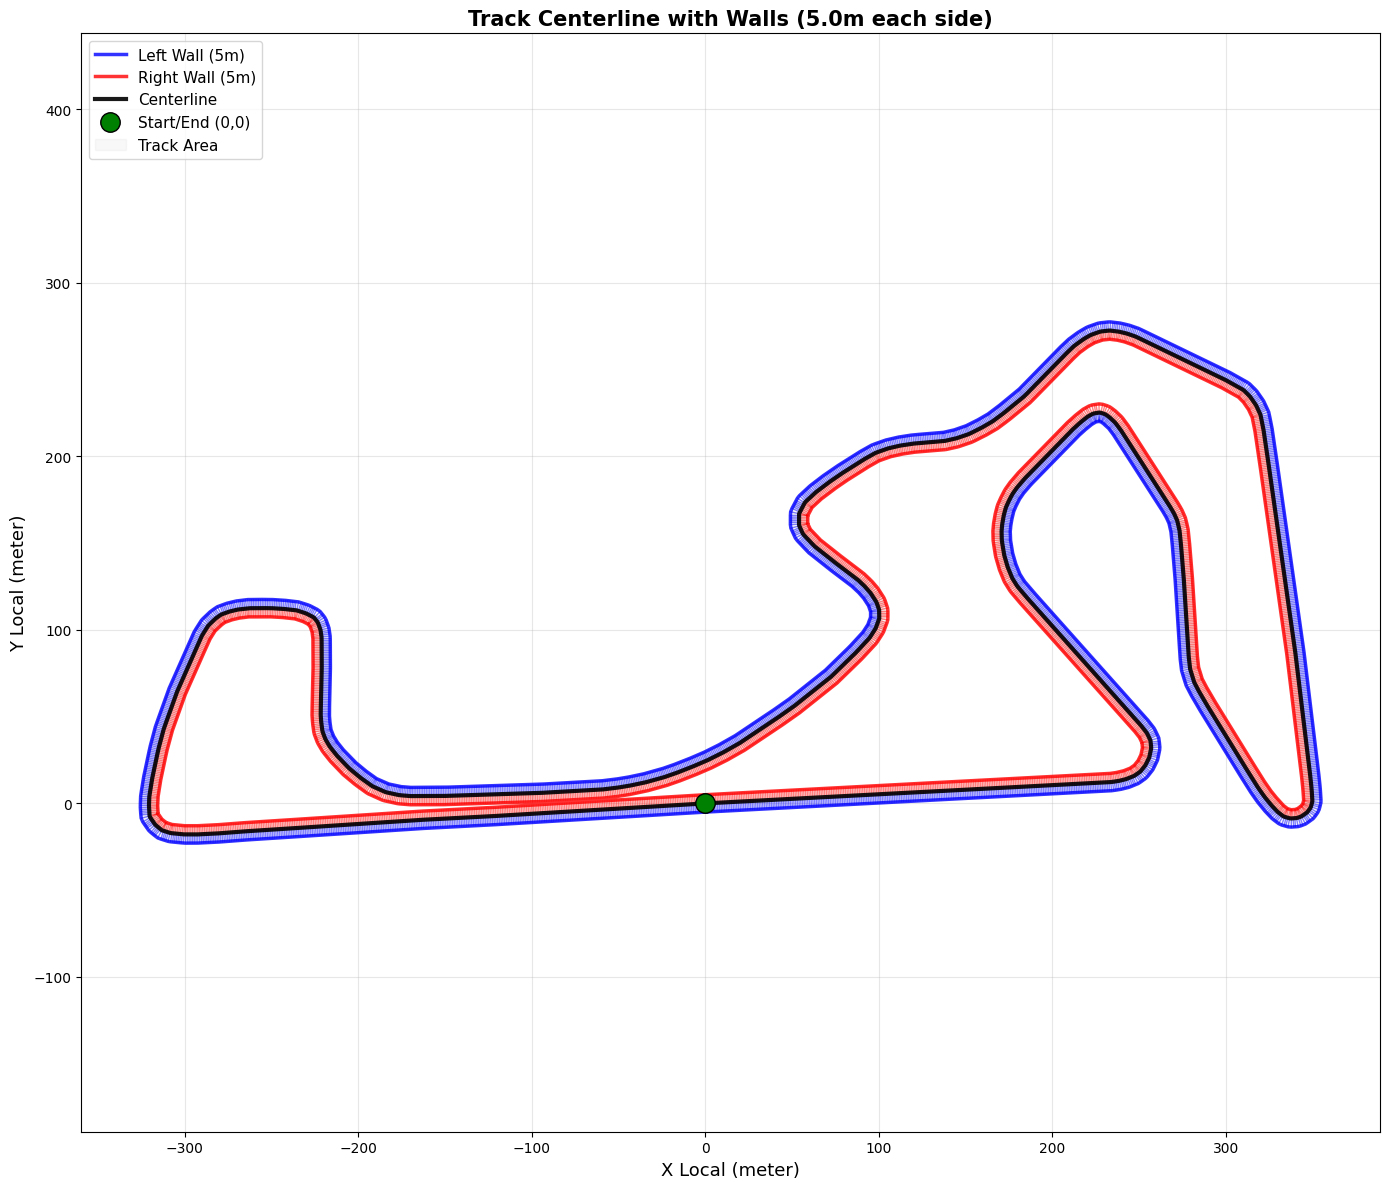


PREVIEW DATA DENGAN TRACK WALLS (10 titik pertama)
 x_meter_interp  y_meter_interp  cumulative_distance  x_wall_left  y_wall_left  x_wall_right  y_wall_right
       0.000000        0.000000             0.000000     0.301349    -4.990911     -0.301349      4.990911
      -0.997905       -0.060253             0.999722    -0.696555    -5.051164     -1.299254      4.930658
      -1.995809       -0.120506             1.999444    -1.694460    -5.111417     -2.297158      4.870404
      -2.993714       -0.180759             2.999166    -2.692364    -5.171670     -3.295063      4.810151
      -3.991618       -0.241012             3.998888    -3.690269    -5.231923     -4.292967      4.749898
      -4.989523       -0.301265             4.998610    -4.688174    -5.292176     -5.290872      4.689645
      -5.987427       -0.361518             5.998332    -5.686078    -5.352429     -6.288777      4.629392
      -6.985332       -0.421772             6.998054    -6.683983    -5.412682     -7.286681

In [7]:
# Block 3: Normalisasi Centerline dan Generating Track Walls

import numpy as np

# Data dari interpolasi sebelumnya
x = df_interp['x_meter_interp'].values
y = df_interp['y_meter_interp'].values
s = df_interp['cumulative_distance'].values

# Track width
track_width = 5.0  # meter untuk kiri dan kanan

# Hitung sudut kemiringan (heading) di setiap titik
# Menggunakan finite difference
n_points = len(x)

# Inisialisasi array untuk heading
heading = np.zeros(n_points)

# Titik tengah menggunakan central difference
for i in range(1, n_points-1):
    dx = x[i+1] - x[i-1]
    dy = y[i+1] - y[i-1]
    heading[i] = np.arctan2(dy, dx)

# Titik pertama menggunakan forward difference
dx_start = x[1] - x[0]
dy_start = y[1] - y[0]
heading[0] = np.arctan2(dy_start, dx_start)

# Titik terakhir menggunakan backward difference
dx_end = x[-1] - x[-2]
dy_end = y[-1] - y[-2]
heading[-1] = np.arctan2(dy_end, dx_end)

# Hitung normal vector (tegak lurus terhadap heading)
# Normal kiri: rotate heading -90 derajat
# Normal kanan: rotate heading +90 derajat
left_normal_x = -np.sin(heading)
left_normal_y = np.cos(heading)

right_normal_x = np.sin(heading)
right_normal_y = -np.cos(heading)

# Generate track walls
x_wall_left = x + track_width * left_normal_x
y_wall_left = y + track_width * left_normal_y

x_wall_right = x + track_width * right_normal_x
y_wall_right = y + track_width * right_normal_y

# Buat DataFrame hasil
df_walls = pd.DataFrame({
    'x_meter_interp': x,
    'y_meter_interp': y,
    'cumulative_distance': s,
    'x_wall_left': x_wall_left,
    'y_wall_left': y_wall_left,
    'x_wall_right': x_wall_right,
    'y_wall_right': y_wall_right
})

# Simpan ke CSV
df_walls.to_csv('centerline_with_walls_5m.csv', index=False)
print(f"Data disimpan ke: centerline_with_walls_5m.csv")

# Visualisasi track dengan walls - SEMUA GARIS
plt.figure(figsize=(14, 12))

# Plot track walls
plt.plot(x_wall_left, y_wall_left, 'b-', linewidth=2.5, label='Left Wall (5m)', alpha=0.8)
plt.plot(x_wall_right, y_wall_right, 'r-', linewidth=2.5, label='Right Wall (5m)', alpha=0.8)

# Plot centerline
plt.plot(x, y, 'k-', linewidth=3, label='Centerline', alpha=0.9, zorder=5)

# Plot SEMUA garis penghubung antara centerline dengan walls
# Gunakan alpha rendah agar tidak terlalu padat
for i in range(n_points):
    # Garis dari centerline ke dinding kiri
    plt.plot([x[i], x_wall_left[i]], [y[i], y_wall_left[i]], 
             'b-', linewidth=1.0, alpha=0.5, zorder=2)
    
    # Garis dari centerline ke dinding kanan
    plt.plot([x[i], x_wall_right[i]], [y[i], y_wall_right[i]], 
             'r-', linewidth=1.0, alpha=0.5, zorder=2)

# Tandai start/end
plt.plot(0, 0, 'go', markersize=14, markeredgecolor='black', linewidth=2, 
         label='Start/End (0,0)', zorder=10)

# Isi area track dengan warna transparan
plt.fill_betweenx(y, x_wall_left, x_wall_right, color='gray', alpha=0.05, label='Track Area')

plt.xlabel('X Local (meter)', fontsize=13)
plt.ylabel('Y Local (meter)', fontsize=13)
plt.title(f'Track Centerline with Walls ({track_width}m each side)', fontsize=15, fontweight='bold')
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Preview data
print("\n" + "="*80)
print("PREVIEW DATA DENGAN TRACK WALLS (10 titik pertama)")
print("="*80)
print(df_walls.head(10).to_string(index=False))

print("\n" + "="*80)
print("PREVIEW DATA DENGAN TRACK WALLS (10 titik terakhir)")
print("="*80)
print(df_walls.tail(10).to_string(index=False))

# Ringkasan
print("\n" + "="*60)
print("RINGKASAN TRACK WALLS")
print("="*60)
print(f"Track width: {track_width} meter (kiri dan kanan)")
print(f"Total width: {2*track_width} meter")
print(f"Jumlah titik: {n_points}")
print(f"Panjang track: {s[-1]:.2f} meter")
print(f"Garis penghubung: {n_points} garis ke kiri dan {n_points} garis ke kanan")
print(f"File output: centerline_with_walls_5m.csv")

COMPLETE RACING LINE OPTIMIZATION + MATLAB EXPORT
Track length: 2366.34 m
Original points: 2368

1. Creating accurate track geometry...
  Calculating smooth curvature for centerline...
  MATLAB track data: 2368 points at 1m resolution
  Using Savitzky-Golay filter for smooth derivatives

2. Preparing for QP optimization...
  QP optimization: 800 points
  Average track width: 10.00 m

3. Building and solving QP problems...
  Solving minimum distance...
    Length: 2254.77 m, Time: 0.082s
  Solving minimum curvature...
    Length: 2348.78 m, Time: 0.328s

RACING LINE RESULTS
Method                 Length (m)  Δ from center
------------------------------------------------------------
Centerline                2366.34              -
Minimum Distance          2254.77      -111.57
Minimum Curvature         2348.78       -17.56

4. Interpolating racing lines to MATLAB resolution...
  Calculating smooth curvature for racing lines...

CURVATURE SMOOTHNESS DIAGNOSTICS
Method                     

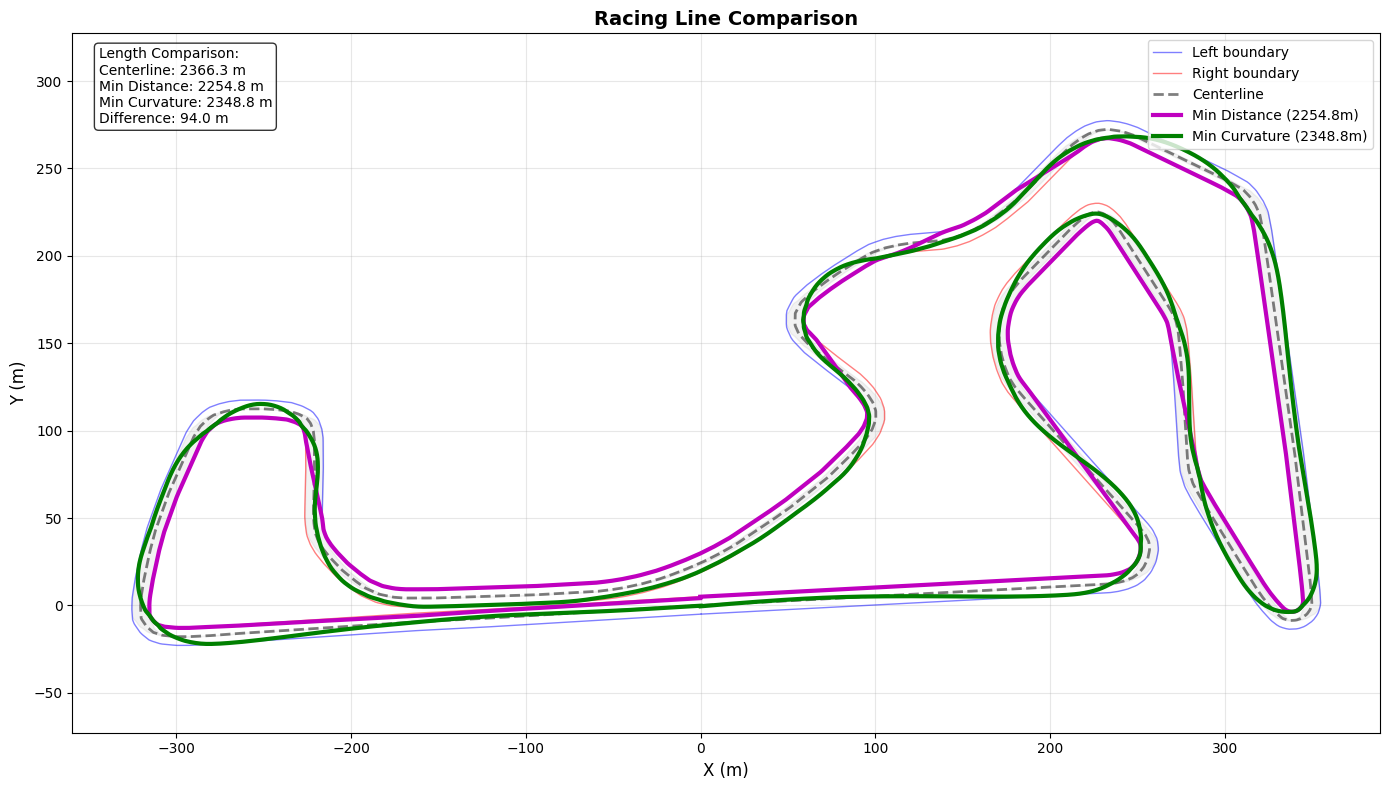

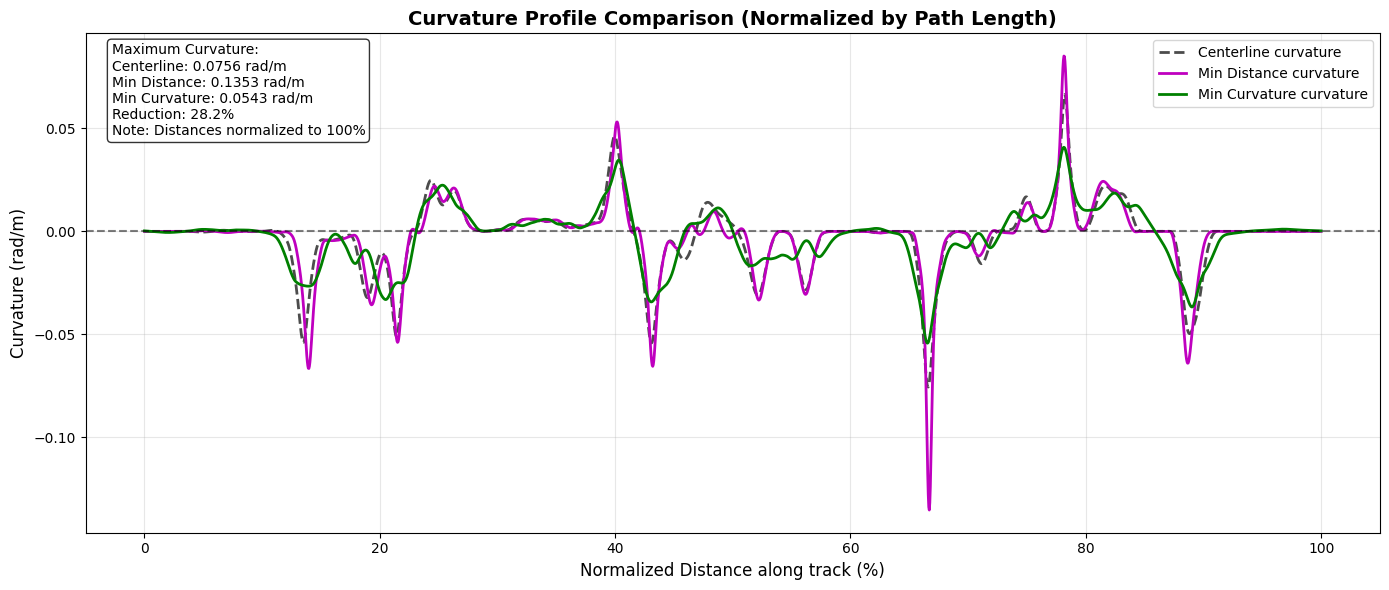


✓ 2 plots generated successfully
✓ 3 CSV files exported for MATLAB
✓ Each racing line has its OWN distance array
✓ Curvature plots normalized for fair comparison

COMPLETE!

GENERATING VISUALIZATIONS


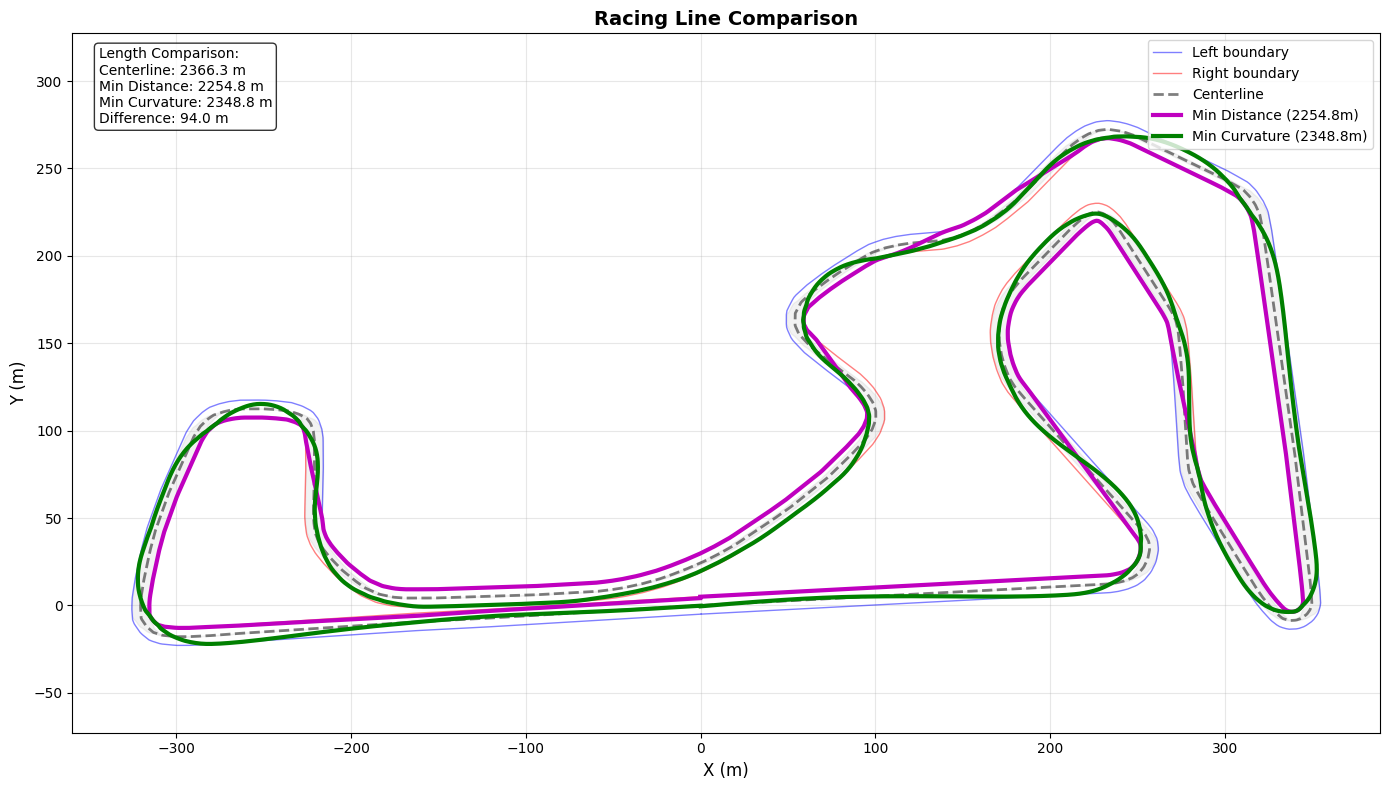

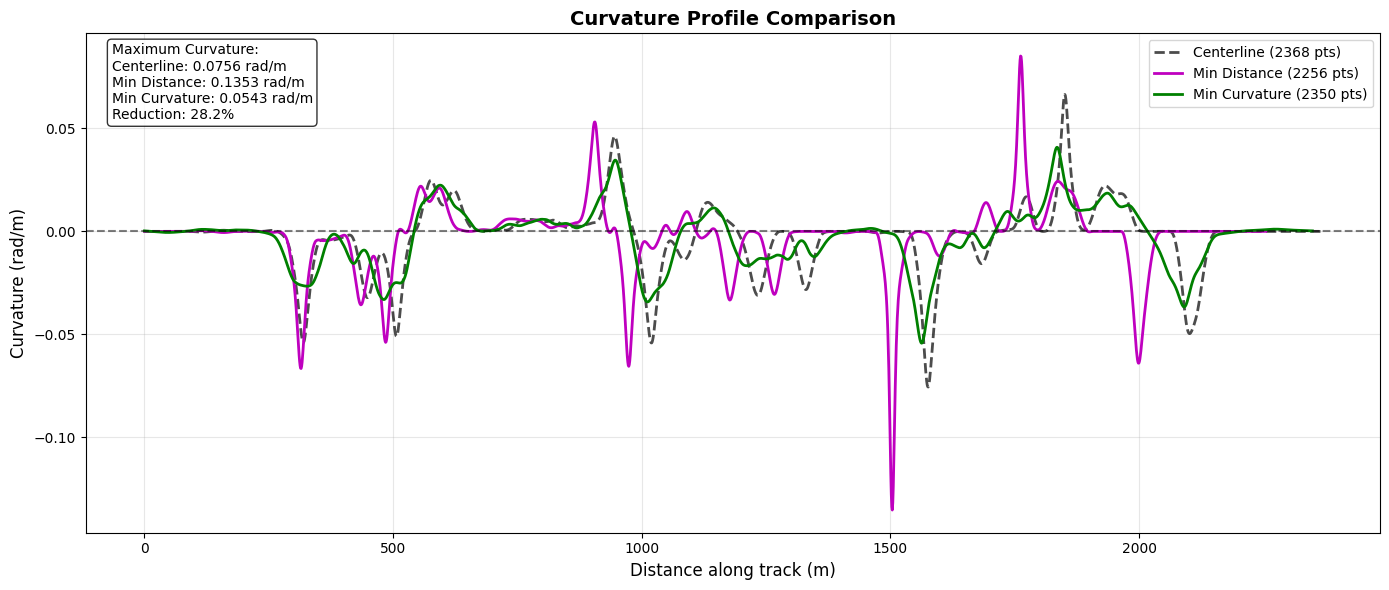


✓ 2 plots generated successfully
✓ 3 CSV files exported for MATLAB
✓ Each racing line has its OWN distance array
✓ Curvature plots use correct distance arrays

COMPLETE!


In [2]:
# COMPLETE RACING LINE OPTIMIZATION WITH MATLAB EXPORT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline, UnivariateSpline
from scipy.optimize import minimize
from scipy.signal import savgol_filter
import time

# Load your centerline with walls data
df_walls = pd.read_csv('centerline_with_walls_5m.csv')

# Extract data
x_center = df_walls['x_meter_interp'].values
y_center = df_walls['y_meter_interp'].values
s_center = df_walls['cumulative_distance'].values
x_left = df_walls['x_wall_left'].values
y_left = df_walls['y_wall_left'].values
x_right = df_walls['x_wall_right'].values
y_right = df_walls['y_wall_right'].values

print("="*60)
print("COMPLETE RACING LINE OPTIMIZATION + MATLAB EXPORT")
print("="*60)
print(f"Track length: {s_center[-1]:.2f} m")
print(f"Original points: {len(x_center)}")

# ============================================================================
# STEP 1: Create cubic splines for accurate track data
# ============================================================================
print("\n1. Creating accurate track geometry...")

# High-quality splines for MATLAB export
cs_x = CubicSpline(s_center, x_center)
cs_y = CubicSpline(s_center, y_center)
cs_xl = CubicSpline(s_center, x_left)
cs_yl = CubicSpline(s_center, y_left)
cs_xr = CubicSpline(s_center, x_right)
cs_yr = CubicSpline(s_center, y_right)

# INCREASE RESOLUTION for smoother curvature (ubah di sini!)
matlab_resolution = 1  # Changed from 1.0 to 0.5 for better curvature
s_matlab = np.arange(0, s_center[-1], matlab_resolution)
if s_matlab[-1] < s_center[-1]:
    s_matlab = np.append(s_matlab, s_center[-1])

# Calculate accurate track data for MATLAB
x_matlab = cs_x(s_matlab)
y_matlab = cs_y(s_matlab)

# ================================================
# MODIFIED: Smooth curvature calculation function
# ================================================
def calculate_smooth_curvature(x, y, s, method='savgol', smoothing_factor=0.1):
    """
    Calculate smooth curvature using selected method
    method: 'savgol', 'spline', or 'moving_average'
    """
    if len(s) < 10:
        # Fallback to simple method for very short paths
        cs_x = CubicSpline(s, x)
        cs_y = CubicSpline(s, y)
        dx = cs_x(s, 1)
        dy = cs_y(s, 1)
        d2x = cs_x(s, 2)
        d2y = cs_y(s, 2)
    elif method == 'savgol':
        # Savitzky-Golay filter (best for noisy data)
        window_length = min(51, len(s) // 2)
        if window_length % 2 == 0:
            window_length += 1
        window_length = max(5, window_length)
        
        # Average spacing
        ds = np.mean(np.diff(s)) if len(s) > 1 else 1.0
        
        # Smooth derivatives
        dx = savgol_filter(x, window_length, 3, deriv=1, delta=ds)
        dy = savgol_filter(y, window_length, 3, deriv=1, delta=ds)
        d2x = savgol_filter(x, window_length, 3, deriv=2, delta=ds)
        d2y = savgol_filter(y, window_length, 3, deriv=2, delta=ds)
        
    elif method == 'spline':
        # Spline smoothing
        smoothing = len(s) * smoothing_factor
        spl_x = UnivariateSpline(s, x, s=smoothing)
        spl_y = UnivariateSpline(s, y, s=smoothing)
        
        dx = spl_x.derivative()(s)
        dy = spl_y.derivative()(s)
        d2x = spl_x.derivative(2)(s)
        d2y = spl_y.derivative(2)(s)
        
    else:  # moving_average
        cs_x = CubicSpline(s, x)
        cs_y = CubicSpline(s, y)
        dx = cs_x(s, 1)
        dy = cs_y(s, 1)
        d2x = cs_x(s, 2)
        d2y = cs_y(s, 2)
        
        # Apply moving average to derivatives
        window = 5
        dx = np.convolve(dx, np.ones(window)/window, mode='same')
        dy = np.convolve(dy, np.ones(window)/window, mode='same')
        d2x = np.convolve(d2x, np.ones(window)/window, mode='same')
        d2y = np.convolve(d2y, np.ones(window)/window, mode='same')
    
    # Curvature calculation
    denominator = (dx**2 + dy**2)**1.5
    denominator[denominator == 0] = np.finfo(float).eps
    
    kappa = (dx * d2y - dy * d2x) / denominator
    
    # Final cleanup
    kappa = np.nan_to_num(kappa, nan=0.0, posinf=0.0, neginf=0.0)
    
    # Final light smoothing on curvature itself
    if len(kappa) > 10:
        kappa = savgol_filter(kappa, min(11, len(kappa)//2), 2)
    
    return kappa

# Use the smooth function for centerline
print("  Calculating smooth curvature for centerline...")
kappa_matlab = calculate_smooth_curvature(x_matlab, y_matlab, s_matlab, method='savgol')

# Derivatives for heading and normal vectors (also smoothed)
window_len = min(31, len(s_matlab)//2)
if window_len % 2 == 0:
    window_len += 1

ds = np.mean(np.diff(s_matlab)) if len(s_matlab) > 1 else 1.0
dx_ds = savgol_filter(x_matlab, window_len, 3, deriv=1, delta=ds)
dy_ds = savgol_filter(y_matlab, window_len, 3, deriv=1, delta=ds)

# Heading (smoothed)
heading_matlab = np.arctan2(dy_ds, dx_ds)
heading_matlab = np.mod(heading_matlab, 2*np.pi)

# Normal vectors (smoothed)
norm = np.sqrt(dx_ds**2 + dy_ds**2)
norm[norm == 0] = 1.0
normal_x_matlab = -dy_ds / norm
normal_y_matlab = dx_ds / norm

# Track widths (original calculation remains)
x_left_wall = cs_xl(s_matlab)
y_left_wall = cs_yl(s_matlab)
x_right_wall = cs_xr(s_matlab)
y_right_wall = cs_yr(s_matlab)

track_width_left = np.zeros(len(s_matlab))
track_width_right = np.zeros(len(s_matlab))

for i in range(len(s_matlab)):
    dx_left = x_left_wall[i] - x_matlab[i]
    dy_left = y_left_wall[i] - y_matlab[i]
    track_width_left[i] = dx_left * normal_x_matlab[i] + dy_left * normal_y_matlab[i]
    
    dx_right = x_right_wall[i] - x_matlab[i]
    dy_right = y_right_wall[i] - y_matlab[i]
    track_width_right[i] = -(dx_right * normal_x_matlab[i] + dy_right * normal_y_matlab[i])

track_width_left = np.abs(track_width_left)
track_width_right = np.abs(track_width_right)

print(f"  MATLAB track data: {len(s_matlab)} points at {matlab_resolution}m resolution")
print(f"  Using Savitzky-Golay filter for smooth derivatives")

# ============================================================================
# STEP 2: Interpolate track for QP optimization (coarser)
# ============================================================================
print("\n2. Preparing for QP optimization...")

def interpolate_track(x, y, w_right, w_left, n_points=800):
    """Interpolate track for QP optimization"""
    pathXY = np.stack([x, y], axis=1)
    stepLengths = np.sqrt(np.sum(np.diff(pathXY, axis=0)**2, axis=1))
    cumulativeLen = np.insert(np.cumsum(stepLengths), 0, 0)
    targetLen = np.linspace(0, cumulativeLen[-1], n_points)

    xt = interp1d(cumulativeLen, x, kind='linear')(targetLen)
    yt = interp1d(cumulativeLen, y, kind='linear')(targetLen)
    w_right_t = interp1d(cumulativeLen, w_right, kind='cubic')(targetLen)
    w_left_t = interp1d(cumulativeLen, w_left, kind='cubic')(targetLen)

    dx = np.gradient(xt)
    dy = np.gradient(yt)
    dL = np.hypot(dx, dy)
    normal_x = -dy / dL
    normal_y = dx / dL

    x_left_bound = xt + normal_x * w_left_t
    y_left_bound = yt + normal_y * w_left_t
    x_right_bound = xt - normal_x * w_right_t
    y_right_bound = yt - normal_y * w_right_t

    return xt, yt, x_left_bound, y_left_bound, x_right_bound, y_right_bound, normal_x, normal_y, w_left_t, w_right_t

# Calculate widths for QP
w_right = np.sqrt((x_right - x_center)**2 + (y_right - y_center)**2)
w_left = np.sqrt((x_left - x_center)**2 + (y_left - y_center)**2)

# Interpolate for QP
n_points = 800
xt, yt, x_left_bound, y_left_bound, x_right_bound, y_right_bound, normal_x, normal_y, w_left_t, w_right_t = interpolate_track(
    x_center, y_center, w_right, w_left, n_points=n_points
)

print(f"  QP optimization: {n_points} points")
print(f"  Average track width: {np.mean(w_left_t + w_right_t):.2f} m")

# ============================================================================
# STEP 3: Build and solve QP problems
# ============================================================================
print("\n3. Building and solving QP problems...")

def build_qp_matrices(x_left, y_left, x_right, y_right):
    """Build QP matrices for shortest path and minimum curvature"""
    delx = x_right - x_left
    dely = y_right - y_left
    n = len(delx)
    
    # Shortest path matrix
    H_sp = np.zeros((n, n))
    B_sp = np.zeros(n)
    
    for i in range(n - 1):
        H_sp[i, i] += delx[i]**2 + dely[i]**2
        H_sp[i + 1, i] = H_sp[i, i + 1] = -delx[i] * delx[i + 1] - dely[i] * dely[i + 1]
        H_sp[i + 1, i + 1] += delx[i + 1]**2 + dely[i + 1]**2
        
        B_sp[i]   += -2 * (x_left[i + 1] - x_left[i]) * delx[i] - 2 * (y_left[i + 1] - y_left[i]) * dely[i]
        B_sp[i+1] +=  2 * (x_left[i + 1] - x_left[i]) * delx[i + 1] + 2 * (y_left[i + 1] - y_left[i]) * dely[i + 1]
    
    # Minimum curvature matrix
    H_mc = np.zeros((n, n))
    B_mc = np.zeros(n)
    
    for i in range(1, n - 1):
        H_mc[i - 1, i - 1] += delx[i - 1]**2 + dely[i - 1]**2
        H_mc[i - 1, i]     += -2 * delx[i - 1] * delx[i] - 2 * dely[i - 1] * dely[i]
        H_mc[i - 1, i + 1] += delx[i - 1] * delx[i + 1] + dely[i - 1] * dely[i + 1]
        
        H_mc[i, i - 1]     += -2 * delx[i - 1] * delx[i] - 2 * dely[i - 1] * dely[i]
        H_mc[i, i]         += 4 * delx[i]**2 + 4 * dely[i]**2
        H_mc[i, i + 1]     += -2 * delx[i] * delx[i + 1] - 2 * dely[i] * dely[i + 1]
        
        H_mc[i + 1, i - 1] += delx[i - 1] * delx[i + 1] + dely[i - 1] * dely[i + 1]
        H_mc[i + 1, i]     += -2 * delx[i] * delx[i + 1] - 2 * dely[i] * dely[i + 1]
        H_mc[i + 1, i + 1] += delx[i + 1]**2 + dely[i + 1]**2
        
        dx = x_left[i + 1] + x_left[i - 1] - 2 * x_left[i]
        dy = y_left[i + 1] + y_left[i - 1] - 2 * y_left[i]
        B_mc[i - 1] += 2 * dx * delx[i - 1] + 2 * dy * dely[i - 1]
        B_mc[i]     += -4 * dx * delx[i] - 4 * dy * dely[i]
        B_mc[i + 1] += 2 * dx * delx[i + 1] + 2 * dy * dely[i + 1]
    
    return delx, dely, H_sp, B_sp, H_mc, B_mc

delx, dely, H_sp, B_sp, H_mc, B_mc = build_qp_matrices(x_left_bound, y_left_bound, x_right_bound, y_right_bound)

def solve_qp_path(x_left, y_left, delx, dely, H, B):
    """Solve QP using L-BFGS-B"""
    n = len(delx)
    bounds = [(0, 1) for _ in range(n)]
    u0 = np.full(n, 0.5)

    def qp_obj(u):
        return 0.5 * u @ H @ u + B @ u
    
    def qp_grad(u):
        return H @ u + B

    res = minimize(qp_obj, u0, jac=qp_grad, bounds=bounds, method='L-BFGS-B', 
                   options={'maxiter': 1000, 'ftol': 1e-8})
    
    u_opt = res.x
    x_traj = x_left + u_opt * delx
    y_traj = y_left + u_opt * dely
    
    return x_traj, y_traj, u_opt

def compute_path_length(x, y):
    """Compute total path length"""
    dx = np.diff(x)
    dy = np.diff(y)
    segment_lengths = np.sqrt(dx**2 + dy**2)
    return np.sum(segment_lengths)

# Solve minimum distance
print("  Solving minimum distance...")
start_time = time.time()
x_mindist, y_mindist, u_mindist = solve_qp_path(x_left_bound, y_left_bound, delx, dely, H_sp, B_sp)
mindist_length = compute_path_length(x_mindist, y_mindist)
print(f"    Length: {mindist_length:.2f} m, Time: {time.time() - start_time:.3f}s")

# Solve minimum curvature
print("  Solving minimum curvature...")
start_time = time.time()
x_mincurv, y_mincurv, u_mincurv = solve_qp_path(x_left_bound, y_left_bound, delx, dely, H_mc, B_mc)
mincurv_length = compute_path_length(x_mincurv, y_mincurv)
print(f"    Length: {mincurv_length:.2f} m, Time: {time.time() - start_time:.3f}s")

centerline_length = s_center[-1]

print("\n" + "="*60)
print("RACING LINE RESULTS")
print("="*60)
print(f"{'Method':<20} {'Length (m)':>12} {'Δ from center':>14}")
print("-" * 60)
print(f"{'Centerline':<20} {centerline_length:12.2f} {'-':>14}")
print(f"{'Minimum Distance':<20} {mindist_length:12.2f} {mindist_length-centerline_length:+12.2f}")
print(f"{'Minimum Curvature':<20} {mincurv_length:12.2f} {mincurv_length-centerline_length:+12.2f}")

# ============================================================================
# STEP 4: Interpolate racing lines to MATLAB resolution (DIPERBAIKI)
# ============================================================================
print("\n4. Interpolating racing lines to MATLAB resolution...")

def calculate_cumulative_distance(x, y):
    """Calculate cumulative distance along a path"""
    dx = np.diff(x)
    dy = np.diff(y)
    segment_lengths = np.sqrt(dx**2 + dy**2)
    return np.insert(np.cumsum(segment_lengths), 0, 0)

# Calculate cumulative distance for each QP racing line
s_mindist_qp = calculate_cumulative_distance(x_mindist, y_mindist)
s_mincurv_qp = calculate_cumulative_distance(x_mincurv, y_mincurv)

# Create NEW distance arrays for each racing line based on their actual lengths
# Make sure each racing line has its own s array at the MATLAB resolution
def create_path_distance_array(total_length, resolution=matlab_resolution):
    """Create s array for a path at given resolution"""
    n_points = int(np.ceil(total_length / resolution)) + 1
    return np.linspace(0, total_length, n_points)

# Create individual s arrays for each racing line
s_mindist_actual = create_path_distance_array(mindist_length, matlab_resolution)
s_mincurv_actual = create_path_distance_array(mincurv_length, matlab_resolution)

# Interpolate racing lines to their OWN s positions
x_mindist_matlab = interp1d(s_mindist_qp, x_mindist, kind='cubic', fill_value='extrapolate')(s_mindist_actual)
y_mindist_matlab = interp1d(s_mindist_qp, y_mindist, kind='cubic', fill_value='extrapolate')(s_mindist_actual)
x_mincurv_matlab = interp1d(s_mincurv_qp, x_mincurv, kind='cubic', fill_value='extrapolate')(s_mincurv_actual)
y_mincurv_matlab = interp1d(s_mincurv_qp, y_mincurv, kind='cubic', fill_value='extrapolate')(s_mincurv_actual)

# Calculate curvature for each racing line using THEIR OWN distance
print("  Calculating smooth curvature for racing lines...")
kappa_mindist = calculate_smooth_curvature(x_mindist_matlab, y_mindist_matlab, s_mindist_actual, method='savgol')
kappa_mincurv = calculate_smooth_curvature(x_mincurv_matlab, y_mincurv_matlab, s_mincurv_actual, method='savgol')

# ================================================
# ADDED: Curvature smoothness diagnostics (DIPERBAIKI)
# ================================================
print("\n" + "="*60)
print("CURVATURE SMOOTHNESS DIAGNOSTICS")
print("="*60)
print(f"{'Method':<25} {'Length (m)':>12} {'Points':>10} {'Std Dev':>12} {'Max Abs':>12}")
print("-" * 60)

diagnostics_data = [
    ("Centerline", kappa_matlab, s_matlab[-1], len(s_matlab)),
    ("Min Distance", kappa_mindist, s_mindist_actual[-1], len(s_mindist_actual)),
    ("Min Curvature", kappa_mincurv, s_mincurv_actual[-1], len(s_mincurv_actual))
]

for name, kappa, length, n_points in diagnostics_data:
    std_dev = np.std(kappa)
    max_abs = np.max(np.abs(kappa))
    print(f"{name:<25} {length:12.2f} {n_points:10} {std_dev:12.6f} {max_abs:12.6f}")

print("\nIMPORTANT: Each racing line has its OWN distance array!")
print(f"  • Centerline: {len(s_matlab)} points, length = {s_matlab[-1]:.2f} m")
print(f"  • Min Distance: {len(s_mindist_actual)} points, length = {s_mindist_actual[-1]:.2f} m")
print(f"  • Min Curvature: {len(s_mincurv_actual)} points, length = {s_mincurv_actual[-1]:.2f} m")

# ============================================================================
# STEP 5: Export ALL data for MATLAB (DIPERBAIKI)
# ============================================================================
print("\n5. Exporting comprehensive data for MATLAB...")

# Create comprehensive DataFrames - each with its OWN s array
df_track_centerline = pd.DataFrame({
    's': s_matlab,
    'x': x_matlab,
    'y': y_matlab,
    'kappa': kappa_matlab,
    'heading': heading_matlab,
    'track_width_left': track_width_left,
    'track_width_right': track_width_right,
    'normal_x': normal_x_matlab,
    'normal_y': normal_y_matlab,
})

df_mindist = pd.DataFrame({
    's': s_mindist_actual,  # Using actual distance for min distance line
    'x': x_mindist_matlab,
    'y': y_mindist_matlab,
    'kappa': kappa_mindist,
})

df_mincurv = pd.DataFrame({
    's': s_mincurv_actual,  # Using actual distance for min curvature line
    'x': x_mincurv_matlab,
    'y': y_mincurv_matlab,
    'kappa': kappa_mincurv,
})

# Save all files
df_track_centerline.to_csv('track_centerline_for_matlab.csv', index=False)
df_mindist.to_csv('racing_line_mindist_for_matlab.csv', index=False)
df_mincurv.to_csv('racing_line_mincurv_for_matlab.csv', index=False)

print(f"✓ Centerline data saved: track_centerline_for_matlab.csv")
print(f"    Length: {s_matlab[-1]:.2f} m, Points: {len(s_matlab)}")
print(f"✓ Minimum distance line: racing_line_mindist_for_matlab.csv")
print(f"    Length: {s_mindist_actual[-1]:.2f} m, Points: {len(s_mindist_actual)}")
print(f"✓ Minimum curvature line: racing_line_mincurv_for_matlab.csv")
print(f"    Length: {s_mincurv_actual[-1]:.2f} m, Points: {len(s_mincurv_actual)}")

print("\n" + "="*60)
print("MATLAB DATA SUMMARY")
print("="*60)
print("Each file has DIFFERENT distance arrays (s) based on actual path length!")
print(f"All files have consistent resolution of {matlab_resolution}m")
print(f"\nColumns in each CSV file:")
print("  s - Distance along THAT SPECIFIC path (m)")
print("  x, y - Coordinates (m)")
print("  kappa - Curvature (rad/m) [SMOOTHED]")

# ============================================================================
# STEP 6: Visualization (DIPERBAIKI untuk curvature plot)
# ============================================================================
print("\n" + "="*60)
print("GENERATING VISUALIZATIONS")
print("="*60)

# PLOT 1: Both racing lines on track (sama seperti sebelumnya)
plt.figure(figsize=(14, 8))

# Plot track boundaries
plt.plot(x_left_wall, y_left_wall, 'b-', linewidth=1, alpha=0.5, label='Left boundary')
plt.plot(x_right_wall, y_right_wall, 'r-', linewidth=1, alpha=0.5, label='Right boundary')
plt.fill_betweenx(y_matlab, x_left_wall, x_right_wall, color='gray', alpha=0.1)

# Plot paths
plt.plot(x_matlab, y_matlab, 'k--', linewidth=2, alpha=0.5, label='Centerline')
plt.plot(x_mindist_matlab, y_mindist_matlab, 'm-', linewidth=3, label=f'Min Distance ({mindist_length:.1f}m)')
plt.plot(x_mincurv_matlab, y_mincurv_matlab, 'g-', linewidth=3, label=f'Min Curvature ({mincurv_length:.1f}m)')

plt.xlabel('X (m)', fontsize=12)
plt.ylabel('Y (m)', fontsize=12)
plt.title('Racing Line Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Add summary
textstr = f'Length Comparison:\nCenterline: {centerline_length:.1f} m\n'
textstr += f'Min Distance: {mindist_length:.1f} m\n'
textstr += f'Min Curvature: {mincurv_length:.1f} m\n'
textstr += f'Difference: {abs(mindist_length-mincurv_length):.1f} m'
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# PLOT 2: Curvature comparison (DIPERBAIKI - normalize by distance)
plt.figure(figsize=(14, 6))

# Normalize s to percentage for fair comparison (karena panjang berbeda)
s_center_norm = s_matlab / s_matlab[-1] * 100
s_mindist_norm = s_mindist_actual / s_mindist_actual[-1] * 100
s_mincurv_norm = s_mincurv_actual / s_mincurv_actual[-1] * 100

plt.plot(s_center_norm, kappa_matlab, 'k--', linewidth=2, alpha=0.7, label='Centerline curvature')
plt.plot(s_mindist_norm, kappa_mindist, 'm-', linewidth=2, label='Min Distance curvature')
plt.plot(s_mincurv_norm, kappa_mincurv, 'g-', linewidth=2, label='Min Curvature curvature')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)

plt.xlabel('Normalized Distance along track (%)', fontsize=12)
plt.ylabel('Curvature (rad/m)', fontsize=12)
plt.title('Curvature Profile Comparison (Normalized by Path Length)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)

# Add curvature statistics
max_kappa_center = np.max(np.abs(kappa_matlab))
max_kappa_mindist = np.max(np.abs(kappa_mindist))
max_kappa_mincurv = np.max(np.abs(kappa_mincurv))

textstr2 = f'Maximum Curvature:\nCenterline: {max_kappa_center:.4f} rad/m\n'
textstr2 += f'Min Distance: {max_kappa_mindist:.4f} rad/m\n'
textstr2 += f'Min Curvature: {max_kappa_mincurv:.4f} rad/m\n'
textstr2 += f'Reduction: {(1-max_kappa_mincurv/max_kappa_center)*100:.1f}%\n'
textstr2 += f'Note: Distances normalized to 100%'

props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.02, 0.98, textstr2, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print("\n✓ 2 plots generated successfully")
print("✓ 3 CSV files exported for MATLAB")
print("✓ Each racing line has its OWN distance array")
print("✓ Curvature plots normalized for fair comparison")
print("\nCOMPLETE!")
# ============================================================================
# STEP 6: Visualization (DIPERBAIKI - menggunakan s yang sesuai)
# ============================================================================
print("\n" + "="*60)
print("GENERATING VISUALIZATIONS")
print("="*60)

# PLOT 1: Both racing lines on track
plt.figure(figsize=(14, 8))

# Plot track boundaries
plt.plot(x_left_wall, y_left_wall, 'b-', linewidth=1, alpha=0.5, label='Left boundary')
plt.plot(x_right_wall, y_right_wall, 'r-', linewidth=1, alpha=0.5, label='Right boundary')
plt.fill_betweenx(y_matlab, x_left_wall, x_right_wall, color='gray', alpha=0.1)

# Plot paths
plt.plot(x_matlab, y_matlab, 'k--', linewidth=2, alpha=0.5, label='Centerline')
plt.plot(x_mindist_matlab, y_mindist_matlab, 'm-', linewidth=3, label=f'Min Distance ({mindist_length:.1f}m)')
plt.plot(x_mincurv_matlab, y_mincurv_matlab, 'g-', linewidth=3, label=f'Min Curvature ({mincurv_length:.1f}m)')

plt.xlabel('X (m)', fontsize=12)
plt.ylabel('Y (m)', fontsize=12)
plt.title('Racing Line Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Add summary
textstr = f'Length Comparison:\nCenterline: {centerline_length:.1f} m\n'
textstr += f'Min Distance: {mindist_length:.1f} m\n'
textstr += f'Min Curvature: {mincurv_length:.1f} m\n'
textstr += f'Difference: {abs(mindist_length-mincurv_length):.1f} m'
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# PLOT 2: Curvature comparison (DIPERBAIKI - menggunakan s masing-masing)
plt.figure(figsize=(14, 6))

# Plot dengan s yang sesuai untuk masing-masing
plt.plot(s_matlab, kappa_matlab, 'k--', linewidth=2, alpha=0.7, label=f'Centerline ({len(s_matlab)} pts)')
plt.plot(s_mindist_actual, kappa_mindist, 'm-', linewidth=2, label=f'Min Distance ({len(s_mindist_actual)} pts)')
plt.plot(s_mincurv_actual, kappa_mincurv, 'g-', linewidth=2, label=f'Min Curvature ({len(s_mincurv_actual)} pts)')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)

plt.xlabel('Distance along track (m)', fontsize=12)
plt.ylabel('Curvature (rad/m)', fontsize=12)
plt.title('Curvature Profile Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)

# Add curvature statistics
max_kappa_center = np.max(np.abs(kappa_matlab))
max_kappa_mindist = np.max(np.abs(kappa_mindist))
max_kappa_mincurv = np.max(np.abs(kappa_mincurv))

textstr2 = f'Maximum Curvature:\nCenterline: {max_kappa_center:.4f} rad/m\n'
textstr2 += f'Min Distance: {max_kappa_mindist:.4f} rad/m\n'
textstr2 += f'Min Curvature: {max_kappa_mincurv:.4f} rad/m\n'
textstr2 += f'Reduction: {(1-max_kappa_mincurv/max_kappa_center)*100:.1f}%'

props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.02, 0.98, textstr2, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print("\n✓ 2 plots generated successfully")
print("✓ 3 CSV files exported for MATLAB")
print("✓ Each racing line has its OWN distance array")
print("✓ Curvature plots use correct distance arrays")
print("\nCOMPLETE!")

VISUALISASI CENTERLINE vs RACING LINE DALAM LATITUDE-LONGITUDE
Centerline 1m: 2368 titik
Panjang centerline: 2366.34 m
Racing line: 2256 titik
Panjang racing line: 2254.77 m

Menggunakan origin: (-6.118483561, 106.8588023)

Range Centerline:
  Latitude:  -6.11864426 hingga -6.11603678
  Longitude: 106.85590694 hingga 106.86196141

Range Racing Line:
  Latitude:  -6.11859936 hingga -6.11608200
  Longitude: 106.85595235 hingga 106.86191627

✓ Racing line dengan koordinat geografis disimpan: racing_line_lat_lon.csv

GENERATING PLOT


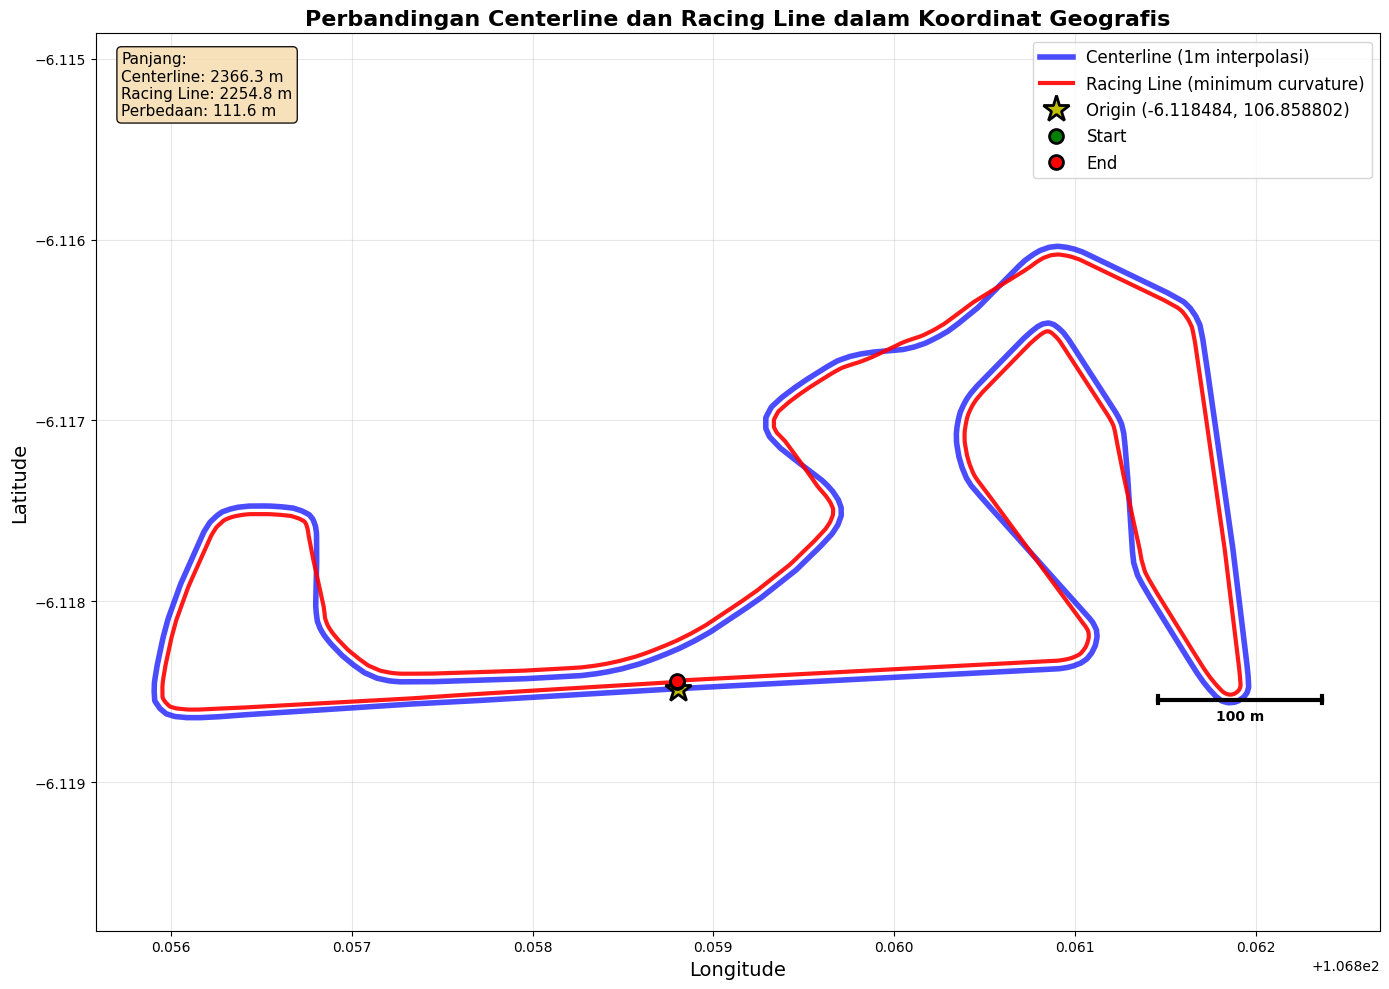

✓ Plot selesai dibuat
✓ Racing line disimpan sebagai racing_line_lat_lon.csv



In [4]:
# Block 5: Visualisasi Centerline vs Racing Line dalam Latitude-Longitude

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("="*60)
print("VISUALISASI CENTERLINE vs RACING LINE DALAM LATITUDE-LONGITUDE")
print("="*60)

# ============================================================================
# 5.1. LOAD DATA
# ============================================================================

# Load centerline interpolasi 1m
centerline_df = pd.read_csv('centerline_interpolated_1m.csv')
print(f"Centerline 1m: {len(centerline_df)} titik")
print(f"Panjang centerline: {centerline_df['cumulative_distance'].max():.2f} m")

# Load racing line minimum curvature
racing_line_df = pd.read_csv('racing_line_mindist_for_matlab.csv')
print(f"Racing line: {len(racing_line_df)} titik")
print(f"Panjang racing line: {racing_line_df['s'].max():.2f} m")

# ============================================================================
# 5.2. KONVERSI KE LATITUDE-LONGITUDE
# ============================================================================

# Titik referensi (origin) dalam latitude, longitude
origin_lat = -6.118483561  # Latitude untuk titik (0,0)
origin_lon = 106.8588023   # Longitude untuk titik (0,0)

print(f"\nMenggunakan origin: ({origin_lat}, {origin_lon})")

# Faktor konversi: meter ke derajat
lat_deg_per_meter = 1 / 111320
lon_deg_per_meter = 1 / (111320 * np.cos(np.radians(origin_lat)))

# Konversi centerline ke latitude-longitude
centerline_df['latitude'] = origin_lat + (centerline_df['y_meter_interp'] * lat_deg_per_meter)
centerline_df['longitude'] = origin_lon + (centerline_df['x_meter_interp'] * lon_deg_per_meter)

# Konversi racing line ke latitude-longitude
racing_line_df['latitude'] = origin_lat + (racing_line_df['y'] * lat_deg_per_meter)
racing_line_df['longitude'] = origin_lon + (racing_line_df['x'] * lon_deg_per_meter)

print(f"\nRange Centerline:")
print(f"  Latitude:  {centerline_df['latitude'].min():.8f} hingga {centerline_df['latitude'].max():.8f}")
print(f"  Longitude: {centerline_df['longitude'].min():.8f} hingga {centerline_df['longitude'].max():.8f}")

print(f"\nRange Racing Line:")
print(f"  Latitude:  {racing_line_df['latitude'].min():.8f} hingga {racing_line_df['latitude'].max():.8f}")
print(f"  Longitude: {racing_line_df['longitude'].min():.8f} hingga {racing_line_df['longitude'].max():.8f}")

# ============================================================================
# 5.3. SIMPAN RACING LINE KE CSV DENGAN LATITUDE-LONGITUDE
# ============================================================================

# Simpan racing line dengan koordinat geografis
racing_line_geo_df = racing_line_df[['latitude', 'longitude']].copy()
racing_line_geo_df.columns = ['latitude', 'longitude']
racing_line_geo_df.to_csv('racing_line_lat_lon.csv', index=False)
print(f"\n✓ Racing line dengan koordinat geografis disimpan: racing_line_lat_lon.csv")

# ============================================================================
# 5.4. VISUALISASI DALAM SATU FIGURE
# ============================================================================

print("\n" + "="*60)
print("GENERATING PLOT")
print("="*60)

# Buat figure
plt.figure(figsize=(14, 10))

# Plot centerline (interpolasi 1m)
plt.plot(centerline_df['longitude'], centerline_df['latitude'], 
         'b-', linewidth=4, alpha=0.7, label='Centerline (1m interpolasi)')

# Plot racing line (minimum curvature)
plt.plot(racing_line_df['longitude'], racing_line_df['latitude'], 
         'r-', linewidth=3, alpha=0.9, label='Racing Line (minimum curvature)')

# Tandai titik origin
plt.plot(origin_lon, origin_lat, 'y*', markersize=20, 
         markeredgecolor='black', markeredgewidth=2, 
         label=f'Origin ({origin_lat:.6f}, {origin_lon:.6f})')

# Tandai titik start/end
start_lat = racing_line_df.iloc[0]['latitude']
start_lon = racing_line_df.iloc[0]['longitude']
plt.plot(start_lon, start_lat, 'go', markersize=10, 
         markeredgecolor='black', markeredgewidth=2, label='Start')

end_lat = racing_line_df.iloc[-1]['latitude']
end_lon = racing_line_df.iloc[-1]['longitude']
plt.plot(end_lon, end_lat, 'ro', markersize=10, 
         markeredgecolor='black', markeredgewidth=2, label='End')

plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Perbandingan Centerline dan Racing Line dalam Koordinat Geografis', 
          fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Tambahkan informasi pada plot
info_text = f'Panjang:\nCenterline: {centerline_df["cumulative_distance"].max():.1f} m\n'
info_text += f'Racing Line: {racing_line_df["s"].max():.1f} m\n'
info_text += f'Perbedaan: {abs(centerline_df["cumulative_distance"].max() - racing_line_df["s"].max()):.1f} m'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=props)

# Tambahkan scale bar (perkiraan)
scale_m = 100  # 100 meter
scale_lat = scale_m * lat_deg_per_meter
scale_lon = scale_m * lon_deg_per_meter

scale_x = centerline_df['longitude'].max() - 0.0005
scale_y = centerline_df['latitude'].min() + 0.0001

plt.plot([scale_x, scale_x + scale_lon], [scale_y, scale_y], 
         'k-', linewidth=3, label='_nolegend_')
plt.plot([scale_x, scale_x], [scale_y-0.00002, scale_y+0.00002], 
         'k-', linewidth=3, label='_nolegend_')
plt.plot([scale_x + scale_lon, scale_x + scale_lon], [scale_y-0.00002, scale_y+0.00002], 
         'k-', linewidth=3, label='_nolegend_')
plt.text(scale_x + scale_lon/2, scale_y - 0.00005, f'{scale_m} m', 
         ha='center', va='top', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Plot selesai dibuat")
print("✓ Racing line disimpan sebagai racing_line_lat_lon.csv")
print("\n" + "="*60)

Max Gradient: 0.06 degrees
Processing and Plotting complete. Results saved to CSV and PNG.


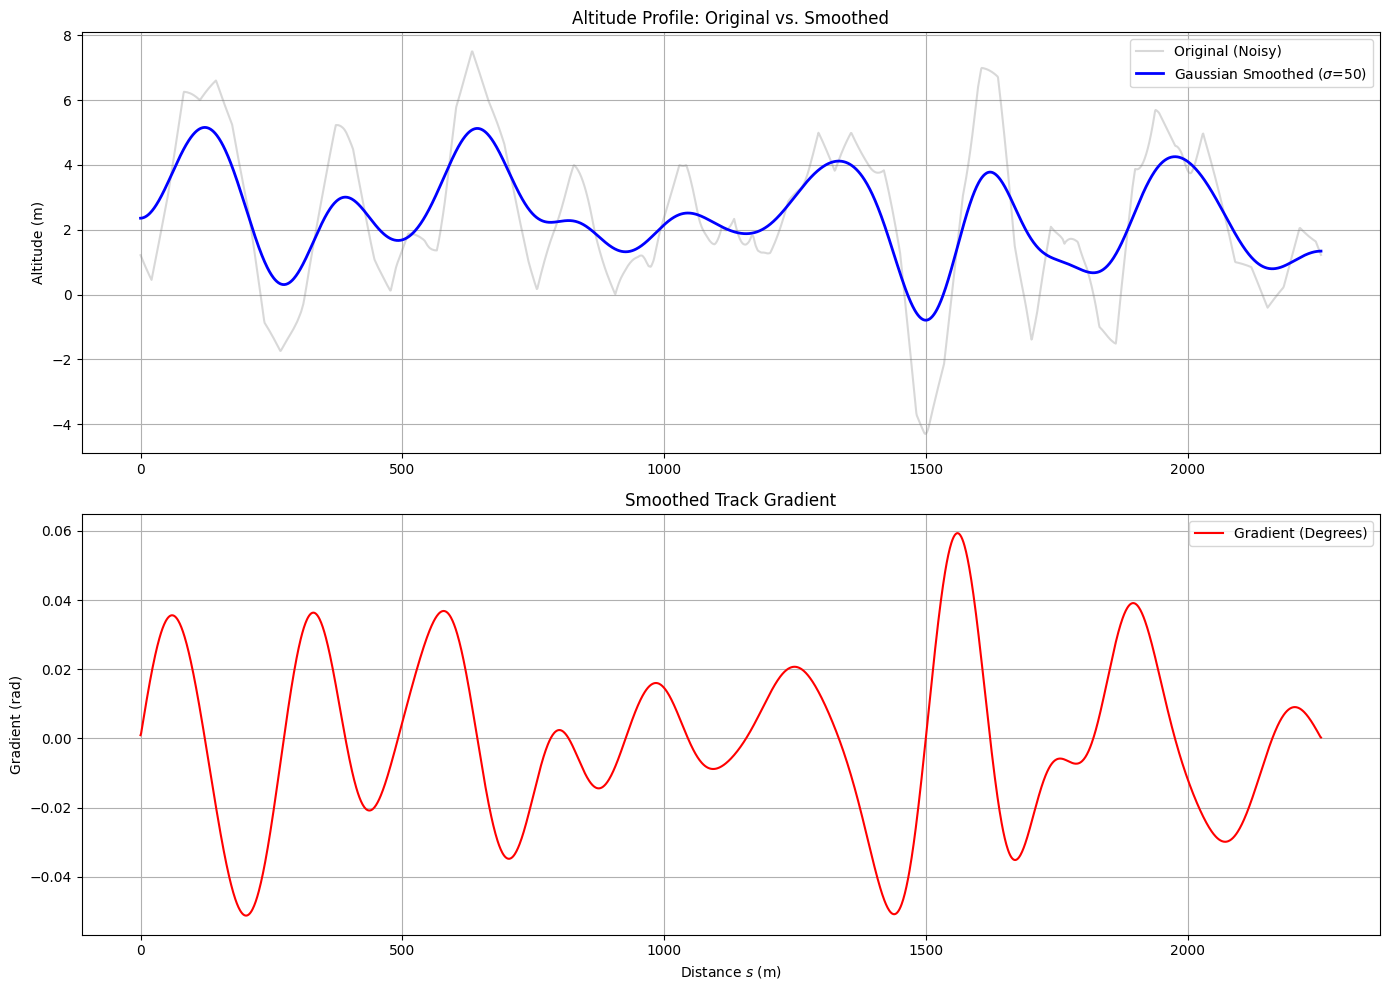

: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# 1. Load the track data
df = pd.read_csv('racing_line_mindist_for_matlab_withalt.csv')

# 2. Configure Smoothing
# sigma=15 is recommended for a balance between noise removal and feature preservation
sigma_val = 50

# 3. Apply Gaussian Smoothing to altitude
# This smooths the 0.1m "staircase" steps into a continuous curve
df['altitude_smooth'] = gaussian_filter1d(df['altitude (m)'], sigma=sigma_val)

# 4. Calculate Gradient using Central Differences
# np.gradient provides a more stable slope calculation for racing lines
ds = np.gradient(df['s'])
dh = np.gradient(df['altitude_smooth'])

# Gradient in Radians: $\arctan(dh / ds)$
df['gradient_rad'] = np.arctan(dh / ds)
# Gradient in Degrees for inspection
df['gradient_deg'] = np.degrees(df['gradient_rad'])

# 5. Save the processed data
df.to_csv('racing_line_gaussian_final.csv', index=False)

# 6. Plotting the results
# Plot 1: Altitude Comparison
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(df['s'], df['altitude (m)'], color='gray', alpha=0.3, label='Original (Noisy)')
plt.plot(df['s'], df['altitude_smooth'], color='blue', linewidth=2, label=f'Gaussian Smoothed ($\sigma$={sigma_val})')
plt.title('Altitude Profile: Original vs. Smoothed')
plt.ylabel('Altitude (m)')
plt.legend()
plt.grid(True)

# Plot 2: Gradient Profile
plt.subplot(2, 1, 2)
plt.plot(df['s'], df['gradient_rad'], color='red', linewidth=1.5, label='Gradient (Degrees)')
plt.title('Smoothed Track Gradient')
plt.xlabel('Distance $s$ (m)')
plt.ylabel('Gradient (rad)')
plt.legend()
plt.grid(True)

# Adjust layout and save image
plt.tight_layout()


print(f"Max Gradient: {df['gradient_rad'].abs().max():.2f} degrees")
print("Processing and Plotting complete. Results saved to CSV and PNG.")
